# Berstein-Vazirani Algorithm

In [3]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

In [21]:
secret_number = '10010101' # Secret number to be guessed

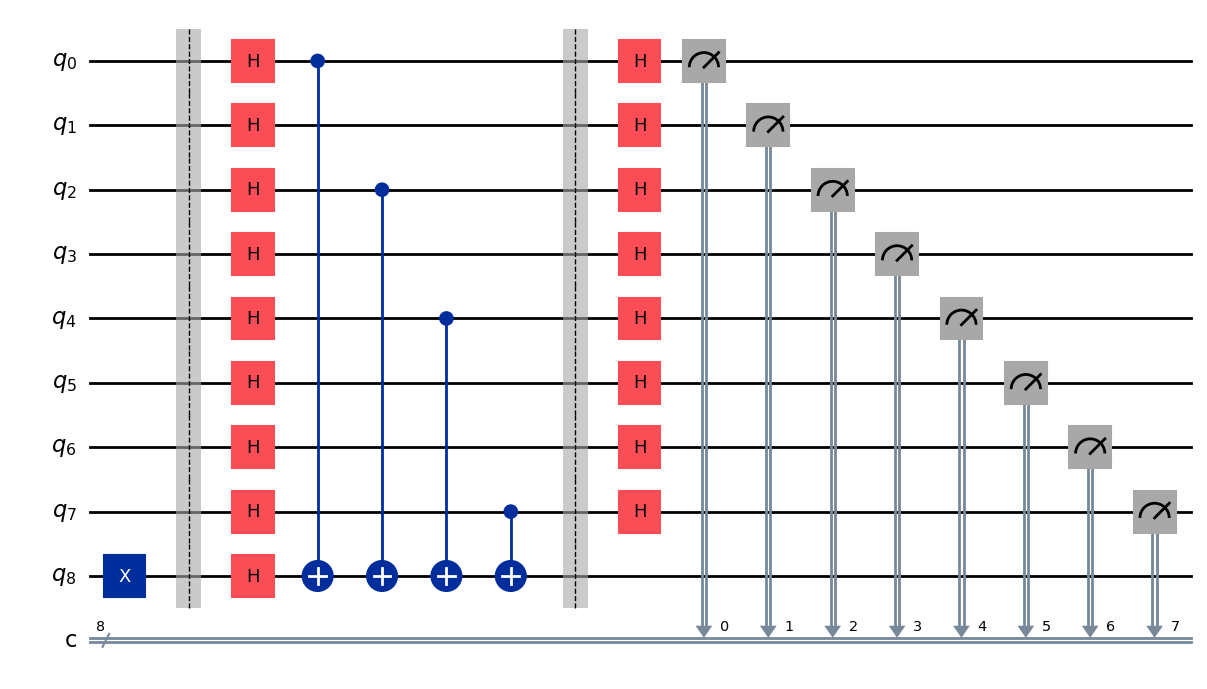

In [22]:
n = len(secret_number) # Number of input qubits
qc = QuantumCircuit(n + 1, n)
qc.x(n) # Initialize ancillary qubit as |1>
qc.barrier()
qc.h(range(n + 1)) # Apply Walsh-Hadamard to all qubits

for i, is_one in enumerate(secret_number[::-1]):
    if is_one == '1':
        qc.cx(i, n) # Apply CNOT gates with control qubit i and target qubit n if the bit value is 1
qc.barrier()
qc.h(range(n)) # Apply Walsh-Hadamard to all qubits except last
qc.measure(range(n), range(n))
qc.draw(output='mpl')

In [24]:
# Execute code on a simulator
backend = AerSimulator()
result = backend.run(qc, shots=1).result()
counts = result.get_counts()
print(f'Secret number: {counts}')

Secret number: {'10010101': 1}
